<a href="https://colab.research.google.com/github/amansingh202/Machine-Learning/blob/main/Deep_Learning/hw2_fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

- I recommend that you start with "hw2.tex" first.
- When you turn in the assignment, do not clear the output.
- Make sure that your python notebook can run end-to-end with no mistake, in case the figures need to be reproduced.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1 Conditional Probability

## [2] point(s) --- part b:

- Complete this after you finish "1 Conditional Probability --- part a" from "hw2.tex".

- Generate `y = wx + b + eps` where `eps` is constructed by the pseudo code in "1 Conditional Probability --- part a".

- Your task is to generate `eps` by changing the line with the comment "# YOUR ANSWER HERE".

- Leave all other lines as is.

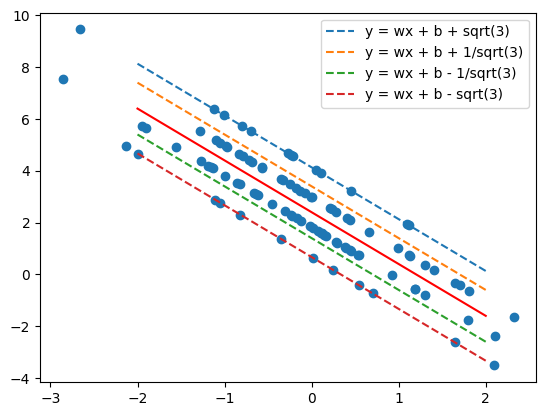

In [12]:
np.random.seed(1729)
N = 100
n = 3
w_star = -2.0
b_star = 2.4
x = np.random.randn(N)


# eps = np.random.randn(N)  # recall that in lecture, we had random gaussian
# eps = None # YOUR ANSWER HERE
steps = np.where(np.random.rand(N, n) < 0.5, 1, -1)
eps = steps.sum(axis=1) / np.sqrt(n)
y = w_star*x + b_star + eps

x_grid = np.linspace(-2,2)
plt.plot(x_grid, w_star*x_grid + b_star, color ='r')
plt.scatter(x,y)
plt.plot(x_grid, w_star * x_grid + b_star + np.sqrt(3), linestyle='--', label='y = wx + b + sqrt(3)')
plt.plot(x_grid, w_star * x_grid + b_star + 1, linestyle='--', label='y = wx + b + 1/sqrt(3)')
plt.plot(x_grid, w_star * x_grid + b_star - 1, linestyle='--', label='y = wx + b - 1/sqrt(3)')
plt.plot(x_grid, w_star * x_grid + b_star - np.sqrt(3), linestyle='--', label='y = wx + b - sqrt(3)')
plt.legend()
plt.show()

## [2] point(s) --- part c:

In the previous parts, you see should scatter points following 4 distinct lines.

- Calculate how many scatter points belong to each of the lines.
- Store the results into `n1,n2,n3,n4` such that `n1 >= n2 >= n3 >= n4`

In [16]:
# YOUR ANSWER HERE (use as many lines as needed)
line1 = w_star * x + b_star + np.sqrt(3)
line2 = w_star * x + b_star + 1/np.sqrt(3)
line3 = w_star * x + b_star - 1/np.sqrt(3)
line4 = w_star * x + b_star - np.sqrt(3)

dist1 = np.abs(y - line1)
dist2 = np.abs(y - line2)
dist3 = np.abs(y - line3)
dist4 = np.abs(y - line4)

distances = np.vstack((dist1, dist2, dist3, dist4)).T
closest_line = np.argmin(distances, axis=1)

n1 = np.sum(closest_line == 0)
n2 = np.sum(closest_line == 1)
n3 = np.sum(closest_line == 2)
n4 = np.sum(closest_line == 3)

n1, n2, n3, n4 = sorted([n1, n2, n3, n4], reverse=True)

total = n1+n2+n3+n4 # do not change this line
print(total)
print(n1/total, n2/total, n3/total, n4/total) # do not change this line

100
0.41 0.34 0.13 0.12


# 2 The Gaussian distribution

## [1] point(s) --- part c:

- Implement the data generative process from part a.

- Compute the number of elements of `y` that is between 1 ± 0.1. Store that into n1

- Compute the number of elements of `y` that is between 0 ± 0.1. Store that into n2

In [19]:
import numpy as np

N = 10000

np.random.seed(1729)

w = np.array([0,1])
b = 3
x = np.vstack([[1,-2] for _ in range(N)])

eps = np.random.normal(0,1/np.sqrt(2), size = N) # YOUR ANSWER HERE (only modify this line)

y = x@w + b + eps

n1 = np.sum((y >= 0.9) & (y <= 1.1)) # YOUR ANSWER HERE (only modify this line)
n2 = np.sum((y >= -0.1) & (y <= 0.1)) # YOUR ANSWER HERE (only modify this line)

print(n1/n2)

2.706896551724138


# 3 Gradient descent for nonlinear regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

N = 200

np.random.seed(1729)

w1_star = -4.0
w2_star = 4.8

x = np.concatenate([1.5*(np.random.randn(N//2)-1), 1.5*(np.random.randn(N//2)+1)])
eps = (1/10)*np.random.randn(N)

y = np.sin(w1_star*x) + np.cos(w2_star*x)+eps

plt.scatter(x,y)

x_grid = np.linspace(-6,6,100)
plt.plot(x_grid, np.sin(w1_star*x_grid) + np.cos(w2_star*x_grid), color ='r')

## [1] points --- part b

In [ ]:
def J(w1,w2):
    predictions = # YOUR CODE HERE
    mse = (1/N)*np.sum((y - predictions) ** 2)
    return mse

def dJdw1(w1, w2):
    N = len(y)
    grad_w1 = # YOUR CODE HERE
    return grad_w1


def dJdw2(w1, w2):
    N = len(y)
    grad_w2 = # YOUR CODE HERE
    return grad_w2


## [4] points --- part c

For this part, only your response in `hw2.tex` will be graded. You can use as many code blocks below as you like.

In [ ]:
## initialization A
w0 = -2.5
b0 = 3.56

## initialization B
# w0 = -2.5
# b0 = 3.57

In [ ]:
# plot_J_surface() # you might find plotting the J function helpful

def plot_J_surface(alpha=1.0):
    w1_values = np.linspace(-6, 1, 100)
    w2_values = np.linspace(-1, 6, 100)
    W, B = np.meshgrid(w1_values, w2_values)

    Z = np.array([[J(w1,w2) for w1 in w1_values] for w2 in w2_values])

    fig = go.Figure(data=[go.Surface(z=Z, x=w1_values, y=w2_values,opacity=alpha)])

    fig.update_layout(title='J(w1, w2) surface plot',
                      scene=dict(xaxis_title='w1',
                                 yaxis_title='w2',
                                 zaxis_title='MSE') ,
                      width=800, height=600)

    return fig


def plot_line_segment(fig, w1, b1, w2, b2, color='blue'):
    mse1 = J(w1, b1)
    mse2 = J(w2, b2)

    fig.add_trace(go.Scatter3d(x=[w1, w2], y=[b1, b2], z=[mse1, mse2],
                               mode='lines',
                               line=dict(color=color, width=2),
                               name=f'Line Segment ({w1}, {b1}) -> ({w2}, {b2})'))


def plot_point(fig, w, b, color='red'):
    mse = J(w, b)
    fig.add_trace(go.Scatter3d(x=[w], y=[b], z=[mse],
                               mode='markers',
                               marker=dict(size=5, color=color),
                               name=f'Point (w={w}, b={b})'))

## [10 bonus] points --- part d